## # Dependencies

In [3]:
# Dependencies
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import AveragePooling2D, Dropout, Flatten, Dense, Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import numpy as np
import os

### Hyperparameters

In [4]:
# Hyperparameters
INIT_LR = 1e-4
EPOCHS = 20 
BS = 32 

### Dataset

In [7]:
# Dataset
DIRECTORY = r"C:\Users\dibye\OneDrive\Desktop\Face Mask Detection\dataset"
CATEGORIES = ["with_mask", "without_mask"]

print("[INFO] Loading images...")
data, labels = [], []
for category in CATEGORIES:
    path = os.path.join(DIRECTORY, category)  
    for img in os.listdir(path):
        img_path = os.path.join(path, img)
        image = load_img(img_path, target_size=(224, 224))
        image = img_to_array(image)
        image = preprocess_input(image)
        data.append(image)
        labels.append(category)

[INFO] Loading images...


c:\Users\dibye\OneDrive\Desktop\Face Mask Detection\Face_Mask\Lib\site-packages\PIL\Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


### Labels encoding

In [8]:
# Labels encoding
lb = LabelBinarizer()
labels = lb.fit_transform(labels)
labels = to_categorical(labels)
data, labels = np.array(data, dtype="float32"), np.array(labels)

(trainX, testX, trainY, testY) = train_test_split(
    data, labels, test_size=0.20, stratify=labels, random_state=42)

### Data augmentation

In [9]:
# Data augmentation
aug = ImageDataGenerator(
    rotation_range=20, zoom_range=0.15, width_shift_range=0.2,
    height_shift_range=0.2, shear_range=0.15,
    horizontal_flip=True, fill_mode="nearest")

### Model building

In [10]:
# Model building (VGG16 base)
baseModel = VGG16(weights="imagenet", include_top=False,
                  input_tensor=Input(shape=(224, 224, 3)))
headModel = baseModel.output
headModel = AveragePooling2D(pool_size=(4, 4))(headModel)  # adjusted for VGG16
headModel = Flatten()(headModel)
headModel = Dense(128, activation="relu")(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(2, activation="softmax")(headModel)
model = Model(inputs=baseModel.input, outputs=headModel)


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 24s 0us/step


### Freeze base layers

In [11]:
# Freeze base layers
for layer in baseModel.layers:
    layer.trainable = False

print("[INFO] Compiling model...")
opt = Adam(learning_rate=INIT_LR)
model.compile(loss="binary_crossentropy", optimizer=opt, metrics=["accuracy"])

[INFO] Compiling model...


### Training

In [12]:
# Training
print("[INFO] Training model...")
history = model.fit(
    aug.flow(trainX, trainY, batch_size=BS),
    steps_per_epoch=len(trainX) // BS,
    validation_data=(testX, testY),
    validation_steps=len(testX) // BS,
    epochs=EPOCHS)

[INFO] Training model...


c:\Users\dibye\OneDrive\Desktop\Face Mask Detection\Face_Mask\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
95/95 ━━━━━━━━━━━━━━━━━━━━ 313s 3s/step - accuracy: 0.7090 - loss: 1.3696 - val_accuracy: 0.8892 - val_loss: 0.3657
Epoch 2/20
 1/95 ━━━━━━━━━━━━━━━━━━━━ 4:03 3s/step - accuracy: 0.8125 - loss: 1.2795

c:\Users\dibye\OneDrive\Desktop\Face Mask Detection\Face_Mask\Lib\site-packages\keras\src\trainers\epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


95/95 ━━━━━━━━━━━━━━━━━━━━ 64s 650ms/step - accuracy: 0.8125 - loss: 1.2795 - val_accuracy: 0.8905 - val_loss: 0.3633
Epoch 3/20
95/95 ━━━━━━━━━━━━━━━━━━━━ 316s 3s/step - accuracy: 0.8164 - loss: 0.7894 - val_accuracy: 0.9296 - val_loss: 0.2395
Epoch 4/20
95/95 ━━━━━━━━━━━━━━━━━━━━ 66s 671ms/step - accuracy: 0.9062 - loss: 0.3141 - val_accuracy: 0.9296 - val_loss: 0.2387
Epoch 5/20
95/95 ━━━━━━━━━━━━━━━━━━━━ 743s 8s/step - accuracy: 0.8678 - loss: 0.5657 - val_accuracy: 0.9518 - val_loss: 0.1812
Epoch 6/20
95/95 ━━━━━━━━━━━━━━━━━━━━ 54s 552ms/step - accuracy: 0.9062 - loss: 0.3991 - val_accuracy: 0.9518 - val_loss: 0.1808
Epoch 7/20
95/95 ━━━━━━━━━━━━━━━━━━━━ 285s 3s/step - accuracy: 0.8715 - loss: 0.4763 - val_accuracy: 0.9544 - val_loss: 0.1574
Epoch 8/20
95/95 ━━━━━━━━━━━━━━━━━━━━ 61s 619ms/step - accuracy: 0.8750 - loss: 0.3853 - val_accuracy: 0.9544 - val_loss: 0.1573
Epoch 9/20
95/95 ━━━━━━━━━━━━━━━━━━━━ 310s 3s/step - accuracy: 0.8965 - loss: 0.3575 - val_accuracy: 0.9609 - val_

### Evaluation

In [13]:
# Evaluation
print("[INFO] Evaluating model...")
predIdxs = model.predict(testX, batch_size=BS)
predIdxs = np.argmax(predIdxs, axis=1)
print(classification_report(testY.argmax(axis=1), predIdxs, target_names=lb.classes_))

[INFO] Evaluating model...
24/24 ━━━━━━━━━━━━━━━━━━━━ 47s 2s/step
              precision    recall  f1-score   support

   with_mask       0.97      0.97      0.97       383
without_mask       0.97      0.97      0.97       384

    accuracy                           0.97       767
   macro avg       0.97      0.97      0.97       767
weighted avg       0.97      0.97      0.97       767



### Save model

In [14]:
# Save model
print("[INFO] Saving model...")
model.save("mask_detector_vgg16.h5")

[INFO] Saving model...


### Plot training loss and accuracy

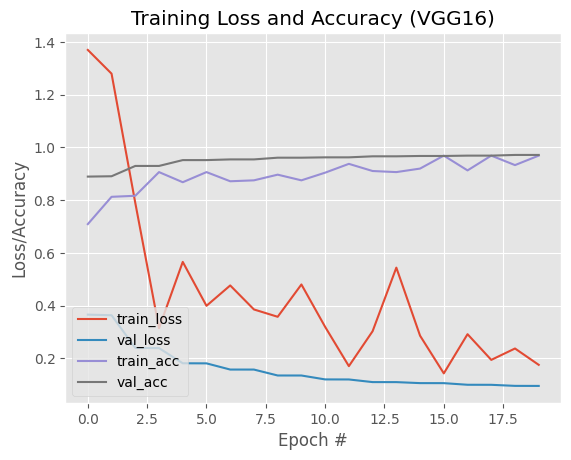

In [15]:
# Plot training loss and accuracy
N = EPOCHS
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), history.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), history.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), history.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy (VGG16)")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.savefig("plot_vgg16.png")